In [1]:
import pandas as pd
import numpy as np

In [2]:
spotify = pd.read_csv("C:/Users/Hp Pc/Downloads/Most Streamed Spotify Songs 2024.csv", encoding = "unicode_escape")

In [3]:
spotify.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",...,30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


In [4]:
spotify.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [5]:
features = ['Track Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams', 'Soundcloud Streams', 'Explicit Track']

In [6]:
spotify[features].isnull().sum()

Track Score              0
Spotify Streams        113
YouTube Views          308
TikTok Views           981
Pandora Streams       1106
Soundcloud Streams    3333
Explicit Track           0
dtype: int64

In [7]:
data = spotify[features]
data = data.fillna(0)

In [8]:
data.isnull().sum()

Track Score           0
Spotify Streams       0
YouTube Views         0
TikTok Views          0
Pandora Streams       0
Soundcloud Streams    0
Explicit Track        0
dtype: int64

In [9]:
data

,Track Score,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams,Explicit Track
0,725.4,"390,470,936","84,274,754","5,332,281,936","18,004,655","4,818,457",0
1,545.9,"323,703,884","116,347,040","208,339,025","7,780,028","6,623,075",1
2,538.4,"601,309,283","122,599,116","3,369,120,610","5,022,621","7,208,651",0
3,444.9,"2,031,280,633","1,096,100,899","14,603,725,994","190,260,277",0,0
4,423.3,"107,034,922","77,373,957",0,"4,493,884","207,179",1
...,...,...,...,...,...,...,...
4595,19.4,"305,049,963","149,247,747","143,934,379","20,104,066","50,633,006",1
4596,19.4,"52,282,360","943,920,245","19,935",0,0,0
4597,19.4,"189,972,685","201,027,333","36,849,005","84,426,740",0,1
4598,19.4,"145,467,020","1,118,595,159","37,757,301","6,817,840",0,0


In [10]:
data.dtypes

Track Score           float64
Spotify Streams        object
YouTube Views          object
TikTok Views           object
Pandora Streams        object
Soundcloud Streams     object
Explicit Track          int64
dtype: object

In [11]:
data = data.replace(regex=',', value='').astype(int)

In [12]:
#scale the data

data = ((data-data.min())/ (data.max()-data.min())) * 9 +1

In [13]:
data.describe()

,Track Score,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams,Explicit Track
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,1.285417,1.917343,1.207222,1.035251,1.400123,1.115080,4.230217
std,0.491400,1.127303,0.377928,0.202138,0.927398,0.509810,4.317604
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.050992,1.133285,1.015558,1.000033,1.000004,1.000000,1.000000
50%,1.127479,1.475861,1.070771,1.004892,1.017873,1.000000,1.000000
75%,1.318697,2.285121,1.231834,1.024300,1.287111,1.003481,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [14]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) #sample func picks a random number from each feature
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [15]:
centroids = random_centroids(data, 4)

C:\Users\Hp Pc\AppData\Local\Temp\ipykernel_6884\3288948173.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample())) #sample func picks a random number from each feature


In [16]:
centroids.T

,Track Score,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams,Explicit Track
0,1.050992,1.880808,1.053509,2.480767,1.384237,1.000000,10.0
1,1.254958,1.148025,1.000000,1.005727,4.213906,1.000000,1.0
2,1.216714,1.006195,1.011959,1.000000,1.003329,1.000000,10.0
3,1.152975,1.354063,1.062037,1.000795,1.150766,1.979006,1.0


In [17]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
                                #Geometric distances formulae
    return distances.idxmin(axis=1)

In [18]:
labels = get_labels(data, centroids)

In [19]:
labels

0       3
1       2
2       3
3       3
4       2
       ..
4595    2
4596    3
4597    2
4598    3
4599    2
Length: 4600, dtype: int64

In [20]:
labels.value_counts()

3    2700
2    1296
0     355
1     249
Name: count, dtype: int64

In [21]:
#obtain Geometric mean of each features(cluster centroids)
def new_centroids(data, labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

VISUALIZATION

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [23]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

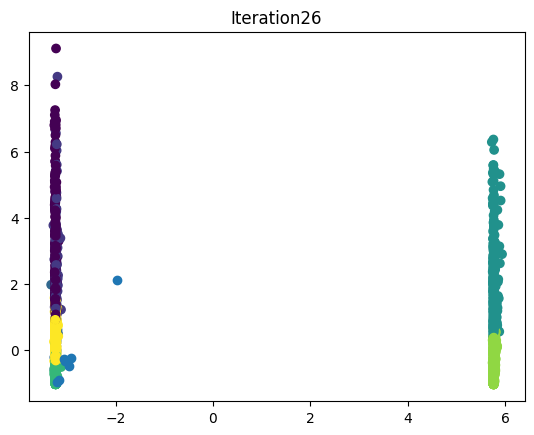

In [25]:
max_iteration = 100
k = 7

centroids = random_centroids(data, k)
#print(f'Centroids formed {centroids}')
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    print(f'Iteration {iteration}: Centroids {centroids}')
    if centroids is not None:
        plot_clusters(data, labels, centroids, iteration)
    else:
        print("Centroids is None")
    iteration +=1

In [26]:
centroids

,0,1,2,3,4,5,6
Track Score,1.246924,1.426072,2.764376,1.439552,1.151448,1.199225,1.204263
Spotify Streams,3.478562,4.349794,1.437287,3.292476,1.192900,1.409666,2.248536
YouTube Views,1.525683,1.490777,1.236863,1.295367,1.108122,1.067831,1.271294
TikTok Views,1.025071,1.054626,1.069735,1.044227,1.021674,1.024828,1.036803
Pandora Streams,4.277555,1.558786,1.126823,1.958685,1.033779,1.095766,1.304931
Soundcloud Streams,1.094851,1.140977,1.039389,1.263262,1.013292,1.091949,1.058476
Explicit Track,1.000000,1.000000,1.000000,10.000000,1.000000,10.000000,1.000000


In [28]:
cat_zero = data[labels ==0]

In [38]:
cat_zero

,Track Score,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams,Explicit Track
53,3.243626,9.218004,5.418737,1.089558,5.510783,3.199079,1.0
80,2.886686,7.243184,4.569452,1.295102,4.796978,1.000000,1.0
114,2.580737,8.060273,2.523560,1.061643,4.359678,1.000000,1.0
118,2.567989,7.319336,3.478475,1.226762,4.779118,1.082832,1.0
169,2.236544,6.216089,1.615516,1.010555,3.757845,1.000000,1.0
...,...,...,...,...,...,...,...
4494,1.000000,2.055068,1.174825,1.001146,3.159143,1.278145,1.0
4522,1.000000,5.250222,1.191924,1.027794,5.255065,1.367159,1.0
4536,1.000000,1.975794,1.106045,1.005284,4.165894,1.028623,1.0
4557,1.000000,2.805130,1.370153,1.012290,3.487095,1.053374,1.0


In [34]:
label_zero = cat_zero.join(spotify[['Track', 'Album Name', 'Artist', 'Release Date']], on = cat_zero.index, how ='inner')

In [37]:
label_zero[['Release Date', 'Artist', 'Track', 'Track Score']]

,Release Date,Artist,Track,Track Score
53,1/6/2017,Ed Sheeran,Shape of You,3.243626
80,3/3/2017,Ed Sheeran,Perfect,2.886686
114,10/18/2018,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,2.580737
118,1/31/2017,Imagine Dragons,Believer,2.567989
169,8/30/2019,Post Malone,Circles,2.236544
...,...,...,...,...
4494,1/1/2014,Elle King,Ex's & Oh's,1.000000
4522,9/24/1991,Nirvana,Smells Like Teen Spirit,1.000000
4536,1/1/2011,Luke Bryan,Country Girl (Shake It For Me),1.000000
4557,1/1/2007,Timbaland,The Way I Are,1.000000


In [42]:
spotify[labels == 5][['Release Date', 'Artist', 'Track', 'Track Score']]

,Release Date,Artist,Track,Track Score
1,5/4/2024,Kendrick Lamar,Not Like Us,545.9
4,5/31/2024,Eminem,Houdini,423.3
9,5/23/2024,Central Cee,BAND4BAND (feat. Lil Baby),330.6
10,5/10/2024,Post Malone,I Had Some Help (feat. Morgan Wallen),322.1
11,6/14/2024,Teddy Swims,The Door,320.2
...,...,...,...,...
4588,12/22/2022,Steps,Braten,19.5
4594,5/3/2024,BUSHIDO ZHO,ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...,19.4
4595,9/5/2017,$uicideboy$,For the Last Time,19.4
4597,2/28/2020,Lil Baby,Grace (feat. 42 Dugg),19.4
